In [161]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42


In [162]:
data=pd.read_csv('dataCompletAvrilto18Juin.csv', sep=";", encoding = "ISO-8859-1")
#Linky=pd.read_csv('Enedis_Conso_Heure_20210325-20210427_09311432680380.csv', sep=";", encoding = "ISO-8859-1")

In [163]:
# Création de jour de semaine (d.isoweekday()) et l'heure de la journée (d.hour+d.minute/60) à partire de timestamp
import datetime
i=0
a=[]
Jsemaine =[]
heure=[]
for t in data.time:
    d=datetime.datetime.fromtimestamp(t)
    Jsemaine.append(d.isoweekday())
    heure.append(d.hour+d.minute/60)

In [177]:
import os
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

test_size=0.3

scaler = StandardScaler()
datascaler=scaler.fit(data.values[:,1:-1])

list = os.listdir('dataImputed')
for fichier in list:
    df = pd.read_csv('dataImputed/'+fichier, sep=",", encoding = "ISO-8859-1")
    
    df= pd.DataFrame(datascaler.inverse_transform(df.values[:,1:]),columns=df.columns[1:])
    
    df["activity"] = data.activity
    df['activity'].replace(['Absent','Present'],[0,1], inplace=True)
    df["JourSemaine"]=Jsemaine
    df["heureday"]=heure
    db2=df.copy()
    #X=db2.drop('time', axis=1).copy()
    X=db2.copy()
    X=X.drop('activity', axis=1)
    y=db2['activity']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
    # importation de la bibiothèque RandomForestClassifier   
    rf_model=RandomForestClassifier(max_features='log2', n_estimators= 300, max_depth=500, criterion='entropy')
    rf_model.fit(X_train,y_train)   
    
    y_true = y_test
    y_pred = rf_model.predict(X_test)
    f1macro=f1_score(y_true, y_pred, average='macro')
    f1micro=f1_score(y_true, y_pred, average='micro')
    f1weighted=f1_score(y_true, y_pred, average='weighted')
    print(fichier,";",rf_model.score(X_test,y_test),";",f1weighted)
####
df=data.copy()
df['activity'].replace(['Absent','Present'],[0,1], inplace=True)
df["JourSemaine"]=Jsemaine
df["heureday"]=heure
db2=df.copy()
#X=db2.drop('time', axis=1).copy()
X=db2.copy()
X=X.drop('time', axis=1).copy()
X=X.drop('activity', axis=1)
y=db2['activity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
# importation de la bibiothèque RandomForestClassifier   
rf_model=RandomForestClassifier(max_features='log2', n_estimators= 300, max_depth=500, criterion='entropy')
rf_model.fit(X_train,y_train)   
    
y_true = y_test
y_pred = rf_model.predict(X_test)
f1macro=f1_score(y_true, y_pred, average='macro')
f1micro=f1_score(y_true, y_pred, average='micro')
f1weighted=f1_score(y_true, y_pred, average='weighted')
print("CompletData",";",rf_model.score(X_test,y_test),";",f1weighted) 
       
    

Back_fill10.csv ; 0.9893443836021903 ; 0.9893418030892461
Back_fill25.csv ; 0.9880124315524641 ; 0.9880045155604495
Back_fill40.csv ; 0.9890483942578068 ; 0.9890353605452918
Back_fill5.csv ; 0.9880124315524641 ; 0.9879978865029917
Forward_fill10.csv ; 0.9894923782743821 ; 0.9894832293471373
Forward_fill25.csv ; 0.9890483942578068 ; 0.9890437081063502
Forward_fill40.csv ; 0.9878644368802723 ; 0.9878497858132362
Forward_fill5.csv ; 0.9889003995856149 ; 0.9888888495057218
kalmanArima_TRUE_MCAR10.csv ; 0.987420452863697 ; 0.9874042001029926
kalmanArima_TRUE_MCAR25.csv ; 0.9871244635193133 ; 0.9871072208657992
kalmanArima_TRUE_MCAR40.csv ; 0.9893443836021903 ; 0.9893322774585771
kalmanArima_TRUE_MCAR5.csv ; 0.9880124315524641 ; 0.9880017761703663
kalmanStructTS_TRUE_MCAR10.csv ; 0.9886044102412314 ; 0.9885981639054658
kalmanStructTS_TRUE_MCAR25.csv ; 0.9871244635193133 ; 0.9871119449578263
kalmanStructTS_TRUE_MCAR40.csv ; 0.9889003995856149 ; 0.9888820533267657
kalmanStructTS_TRUE_MCAR5.csv

# RandomForestClassifier

In [134]:
# importation de la bibiothèque RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# construire un model random forest
# Instanciation du modèle
rf_model=RandomForestClassifier(max_features='log2', n_estimators= 300, max_depth=500, criterion='entropy') 
# entrainement du model
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=500, max_features='log2',
                       n_estimators=300)

In [136]:
# afficher le score du modele sur les données de test
rf_model.score(X_test,y_test)

0.9757288737605446

In [137]:
# afficher l’importance des variables de notre modèle de forêt aléatoire
pd.DataFrame(rf_model.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
CO2,0.507727
Temperature,0.189898
Pressure,0.130526
Humidity,0.102656
Noise,0.069192


# Matrice de confusion

In [138]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, rf_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2335,123
Abscent_data,41,4258


In [139]:
from sklearn import metrics

y_pred = rf_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.98274411, 0.97192422]),
 array([0.94995932, 0.9904629 ]),
 array([0.96607365, 0.98110599]),
 array([2458, 4299], dtype=int64))

In [140]:
#db2['Activity_Pred']=model.predict(X)

In [147]:
## SVM

In [148]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_model = make_pipeline(StandardScaler(), SVC(C=10, gamma=1))
svc_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=1))])

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)

In [150]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, svc_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2253,205
Abscent_data,113,4186


In [151]:
from sklearn import metrics

y_pred = svc_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.95224007, 0.9533136 ]),
 array([0.91659886, 0.97371482]),
 array([0.9340796 , 0.96340621]),
 array([2458, 4299], dtype=int64))

# KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=1,metric='manhattan')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [153]:
KNN_model.score(X_test,y_test)

0.9711410389225987

In [154]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, KNN_model.predict(X_test)),
             index = ["Present_data", "Abscent_data"],
             columns = ["Present_predit", "Abscent_predit"])

,Present_predit,Abscent_predit
Present_data,2350,108
Abscent_data,87,4212


In [155]:
from sklearn import metrics

y_pred = KNN_model.predict(X_test)
y_true = y_test
metrics.precision_recall_fscore_support(y_true, y_pred, beta=1)

(array([0.96430037, 0.975     ]),
 array([0.95606184, 0.97976274]),
 array([0.96016343, 0.97737557]),
 array([2458, 4299], dtype=int64))

In [147]:
from datetime import datetime 

In [148]:
d1 = datetime.now()

In [131]:
d1.hour+d1.minute/60

10.6

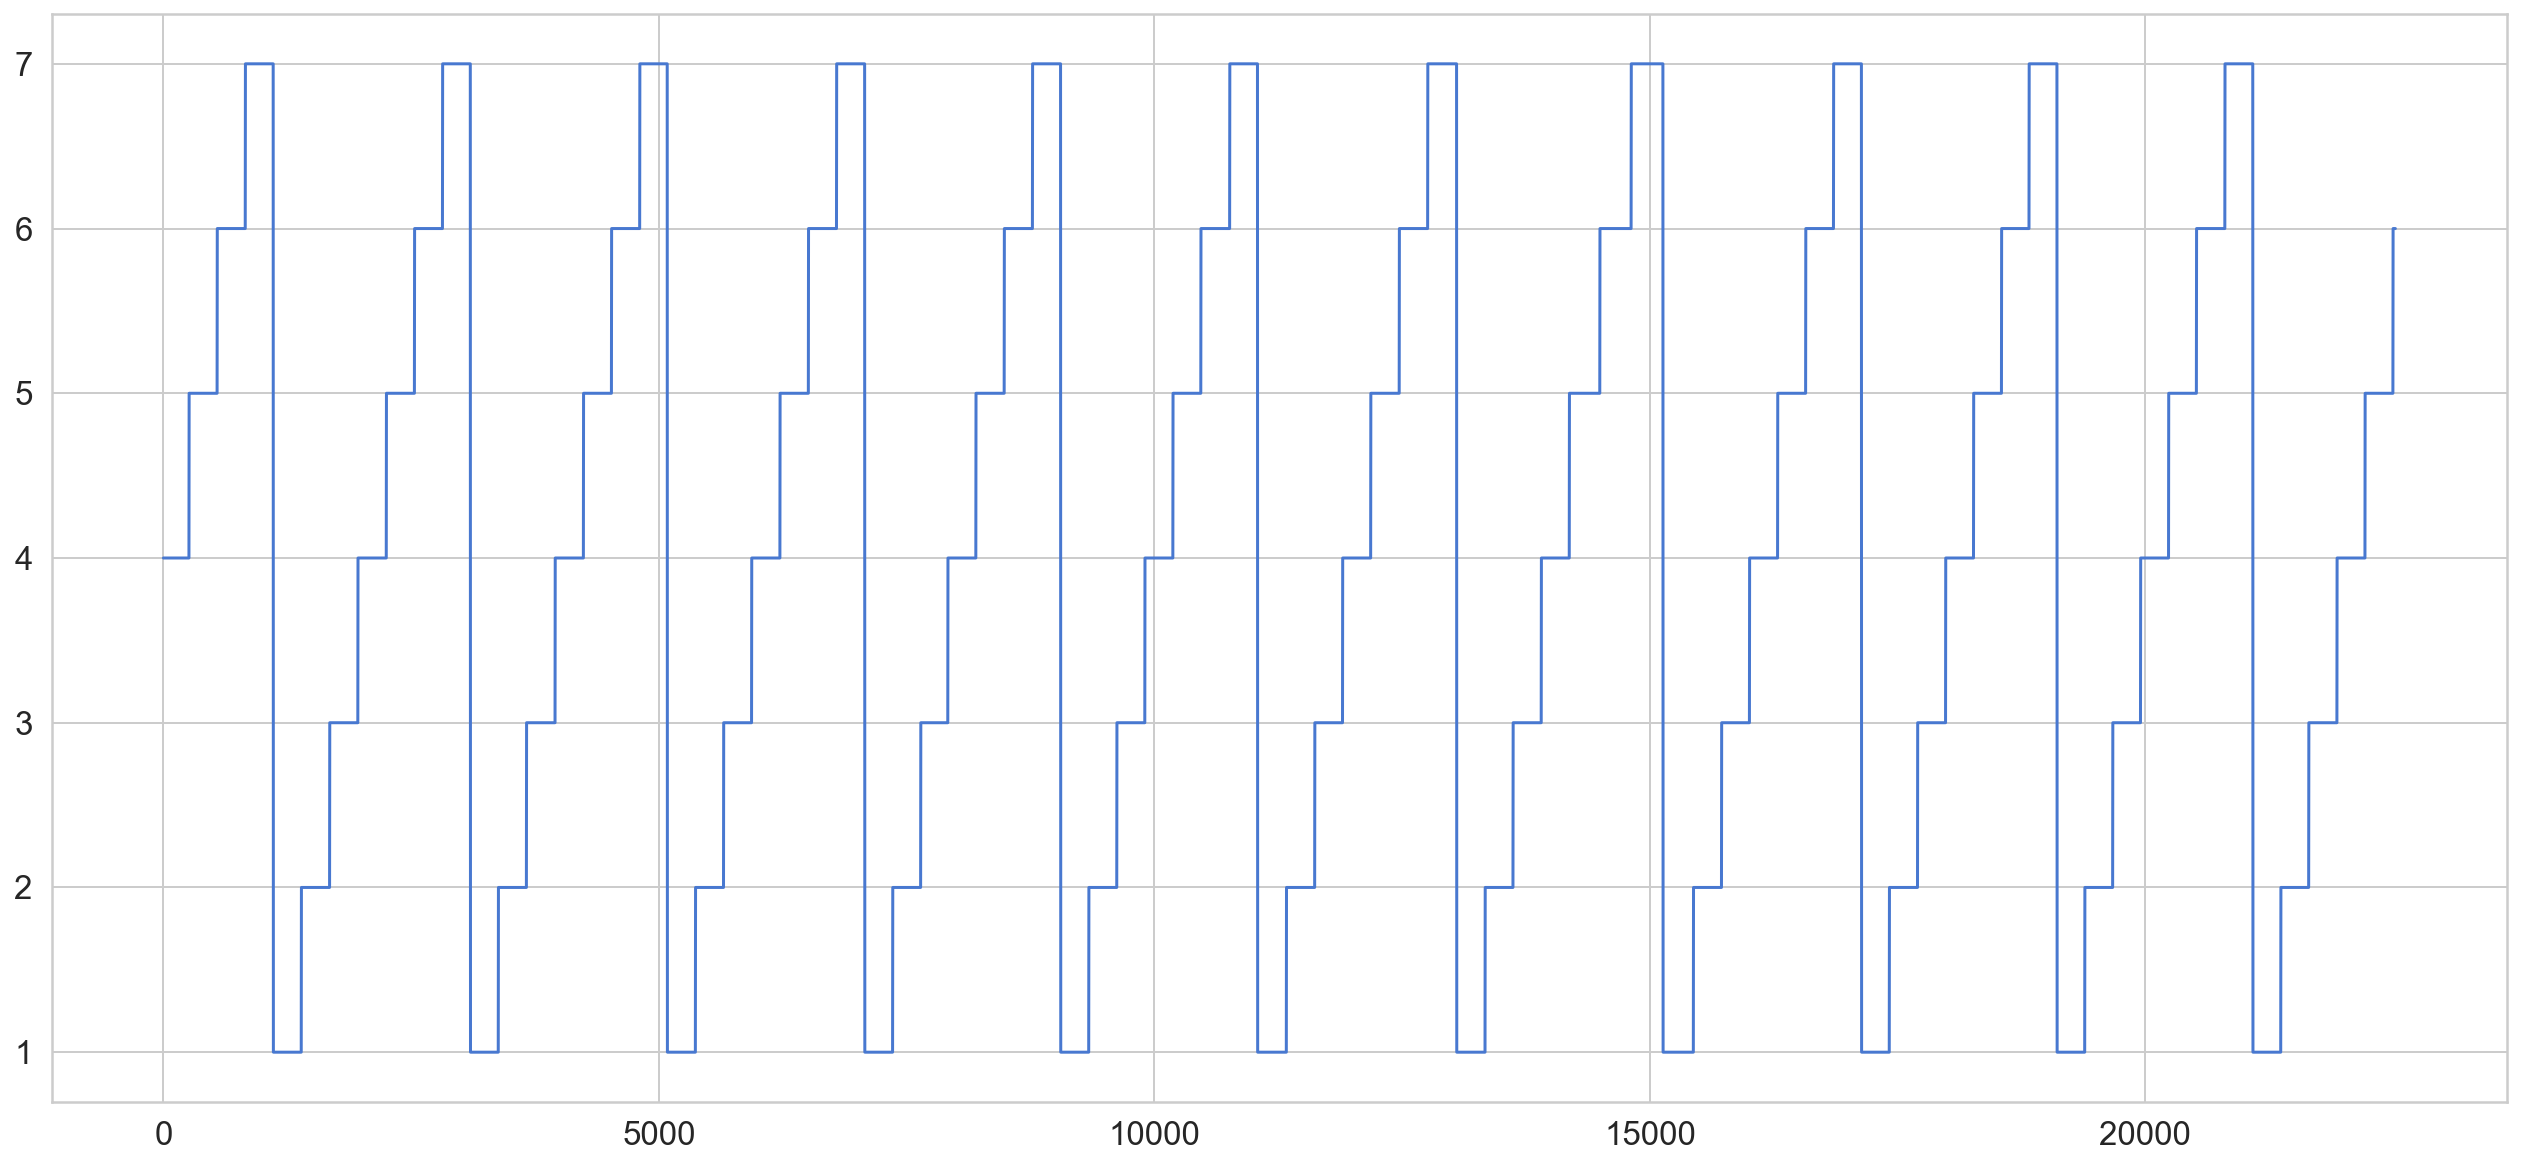

In [174]:
plt.plot(Jsemaine)


22523